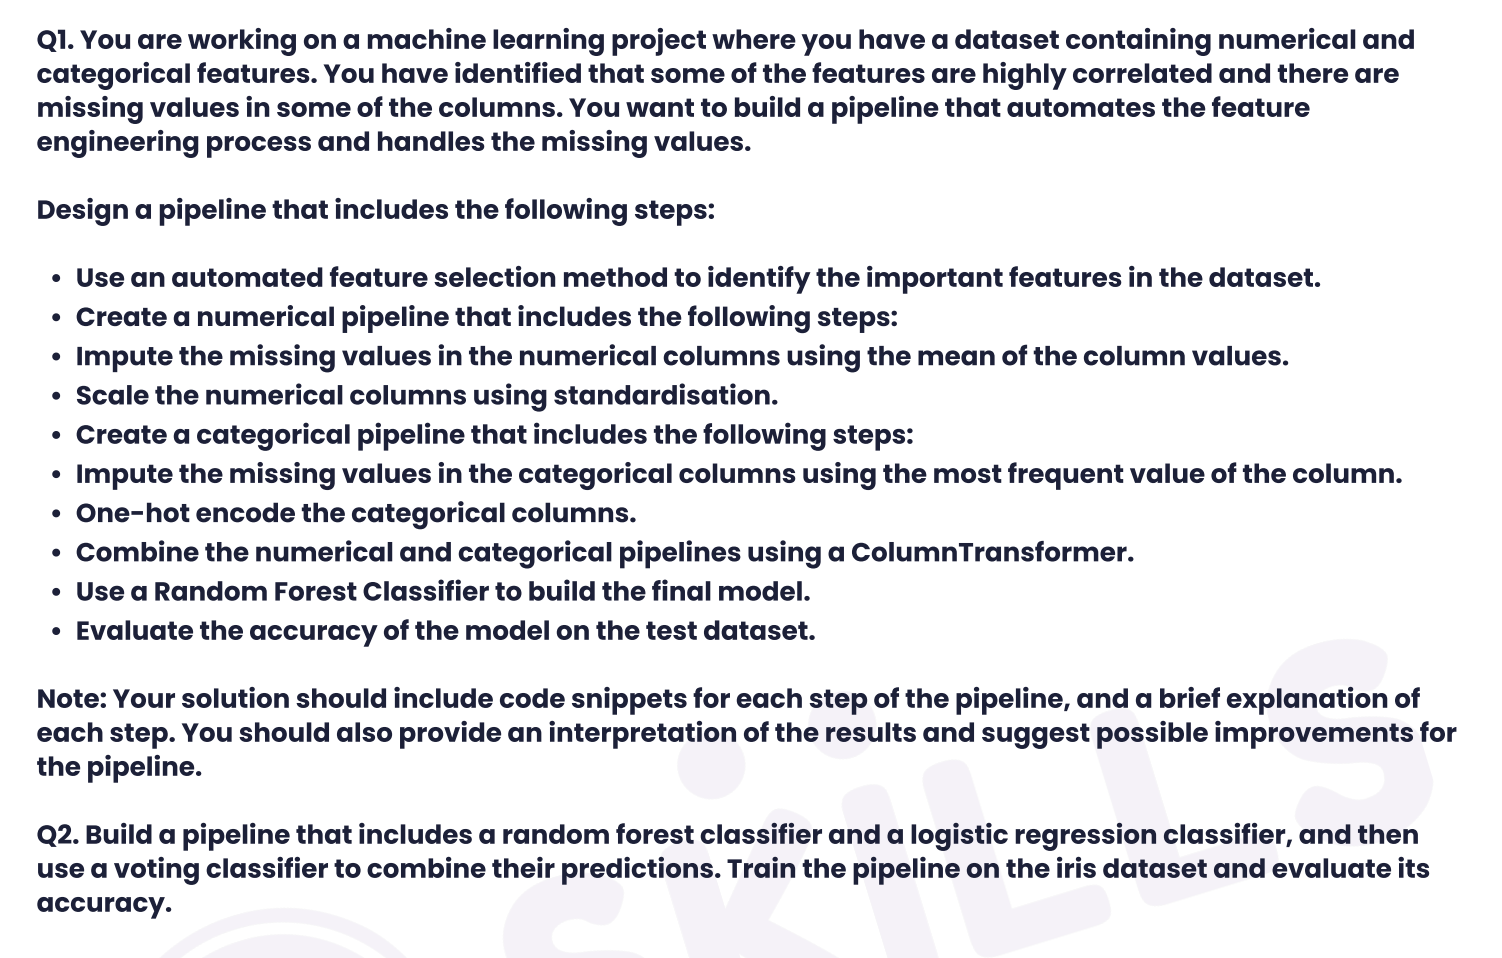

1.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your dataset and split into features and target variable (X and y)

# Step 1: Automated feature selection using Random Forest Classifier
rf_selector = RandomForestClassifier(n_estimators=100, random_state=42)
feature_selector = SelectFromModel(rf_selector)

# Step 2: Numerical Pipeline
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Step 3: Categorical Pipeline
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Step 4: Combine Numerical and Categorical Pipelines
preprocessor = ColumnTransformer([
    ('numeric', numeric_pipeline, numeric_features),  # numeric_features should be a list of numerical column names
    ('categorical', categorical_pipeline, categorical_features)  # categorical_features should be a list of categorical column names
])

# Step 5: Final Pipeline with Random Forest Classifier
final_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Step 6: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 7: Train the pipeline
final_pipeline.fit(X_train, y_train)

# Step 8: Evaluate the accuracy of the model on the test dataset
y_pred = final_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Interpretation of Results and Possible Improvements:

The pipeline automates feature engineering by selecting important features using a Random Forest Classifier.

Missing values are handled appropriately for both numerical and categorical features.

The pipeline scales numerical features and encodes categorical features using one-hot encoding.

The model is trained using a Random Forest Classifier.

The accuracy of the model on the test dataset is evaluated.
Possible improvements:

Experiment with different feature selection methods and hyperparameters for better feature selection.

Explore different imputation strategies for handling missing values.

Try other scaling techniques for numerical features.

Experiment with different classifiers or ensemble methods for better model performance.

2.

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

# Define individual classifiers
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
logistic_classifier = LogisticRegression()

# Build a pipeline with voting classifier
voting_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('voting', VotingClassifier(estimators=[('rf', rf_classifier), ('lr', logistic_classifier)], voting='hard'))
])

# Train the pipeline on the iris dataset
voting_pipeline.fit(X_train, y_train)

# Evaluate accuracy
accuracy_voting = voting_pipeline.score(X_test, y_test)
print("Accuracy (Voting Classifier):", accuracy_voting)


In this pipeline:

Both RandomForestClassifier and LogisticRegression are used as individual classifiers.
They are combined using a VotingClassifier with 'hard' voting.
The pipeline is trained and evaluated for accuracy on the iris dataset.
Interpretation: The voting classifier combines predictions from multiple classifiers, potentially improving overall performance compared to individual classifiers.

Possible Improvements:

Experiment with different combinations of classifiers.
Explore different voting strategies ('soft' voting).
Tune hyperparameters of individual classifiers for better performance.